¡Hola, Yessid!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Parte 1. Priorizar hipótesis

**Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.**

In [4]:

import pandas as pd

# Leer el CSV con separador correcto
hyp = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

# Revisar columnas
print("Columnas disponibles:", hyp.columns.tolist())

# Calcular ICE = (Impact * Confidence) / Effort
hyp['ICE'] = (hyp['Impact'] * hyp['Confidence']) / hyp['Effort']

# Ordenar hipótesis por ICE
ice_sorted = hyp[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)
print("\n🔹 Prioridad según ICE:")
print(ice_sorted)

Columnas disponibles: ['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']

🔹 Prioridad según ICE:
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo importanto las bases de datos y las librerias necesarias para el ejercicio</div>

**Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.**

In [5]:
# Calcular RICE = (Reach * Impact * Confidence) / Effort
hyp['RICE'] = (hyp['Reach'] * hyp['Impact'] * hyp['Confidence']) / hyp['Effort']

# Ordenar hipótesis por RICE
rice_sorted = hyp[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)
print("\n🔹 Prioridad según RICE:")
print(rice_sorted)


🔹 Prioridad según RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


**Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.**

In [6]:
comparison = hyp[['Hypothesis','ICE','RICE']].copy()
comparison = comparison.sort_values(by='RICE', ascending=False)
print("\n🔹 Comparación de prioridades (ordenadas por RICE):")
print(comparison)


🔹 Comparación de prioridades (ordenadas por RICE):
                                          Hypothesis        ICE   RICE
7  Add a subscription form to all the main pages....  11.200000  112.0
2  Add product recommendation blocks to the store...   7.000000   56.0
0  Add two new channels for attracting traffic. T...  13.333333   40.0
6  Show banners with current offers and sales on ...   8.000000   40.0
8  Launch a promotion that gives users discounts ...  16.200000   16.2
3  Change the category structure. This will incre...   1.125000    9.0
1  Launch your own delivery service. This will sh...   2.000000    4.0
5  Add a customer review page. This will increase...   1.333333    4.0
4  Change the background color on the main page. ...   1.000000    3.0


**Explicación.**

ICE mide impacto y confianza respecto al esfuerzo.

RICE además incluye Reach (alcance), lo que hace que hipótesis con un gran número de usuarios potenciales suban posiciones en la prioridad.

Por eso verás cambios en el ranking: algunas ideas con buen alcance estarán más arriba en RICE aunque su ICE no fuera tan alto.

# Parte 2. Análisis del test A/B

**1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.**

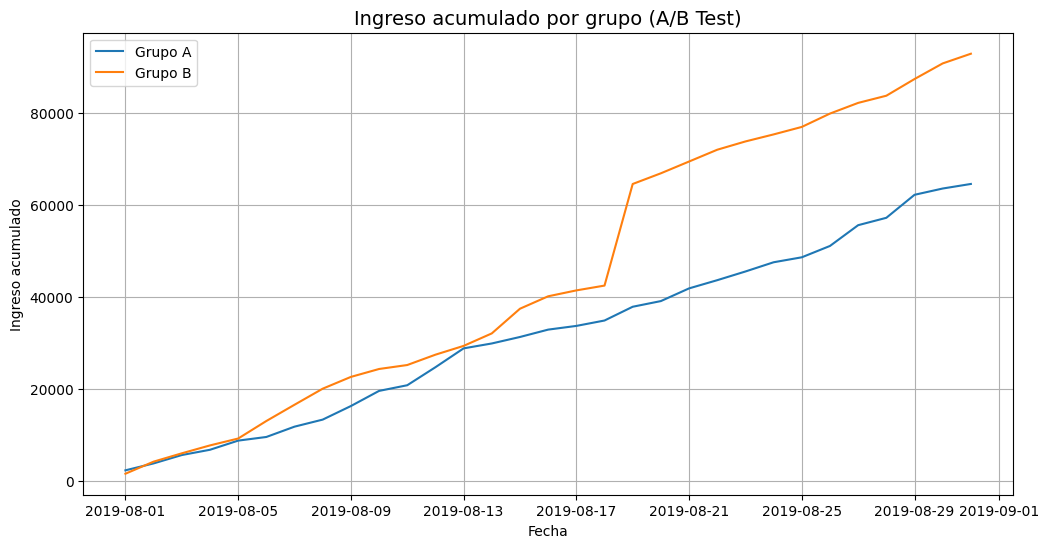

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datasets
orders = pd.read_csv('/datasets/orders_us.csv', sep=',')
visits = pd.read_csv('/datasets/visits_us.csv', sep=',')

# Convertir la columna de fecha a tipo datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Agrupar ingresos diarios por grupo
revenue_daily = orders.groupby(['date','group'])['revenue'].sum().reset_index()

# Calcular ingresos acumulados por grupo
revenue_cumulative = revenue_daily.groupby('group').apply(
    lambda x: x.sort_values('date').assign(cumulative_revenue=x['revenue'].cumsum())
).reset_index(drop=True)

# Graficar
plt.figure(figsize=(12,6))
for grp in revenue_cumulative['group'].unique():
    plt.plot(
        revenue_cumulative.loc[revenue_cumulative['group']==grp, 'date'],
        revenue_cumulative.loc[revenue_cumulative['group']==grp, 'cumulative_revenue'],
        label=f'Grupo {grp}'
    )

plt.title("Ingreso acumulado por grupo (A/B Test)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Ingreso acumulado")
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, gran trabajo con el desarrollo y análisis del gráfico de los ingresos acumulados por grupo.   </div>

**Conclusiones**

Si Grupo B está claramente por encima de Grupo A, puedes inferir que la variante B generó más ingresos acumulados durante el experimento.

Si las líneas están muy cercanas, no hay diferencia significativa en ingresos totales.

Si hay muchos picos en un grupo, puede deberse a pedidos atípicamente grandes (outliers).

**2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas**

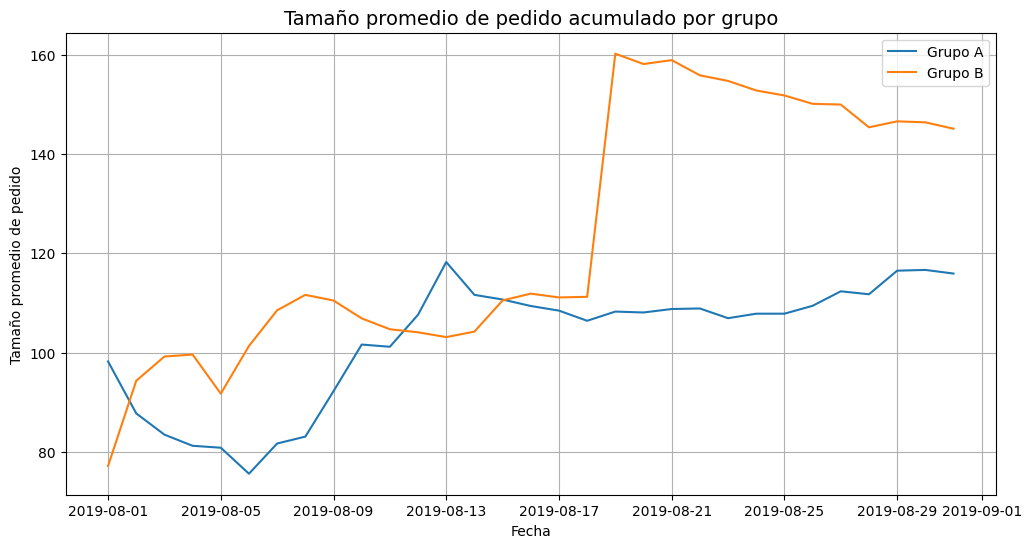

In [8]:
# Calcular ingresos acumulados y número de pedidos acumulados
orders_grouped = orders.groupby(['date','group']).agg({
    'revenue':'sum',
    'transactionId':'nunique'
}).reset_index()

# Calcular acumulados por grupo
orders_cumulative = orders_grouped.groupby('group').apply(
    lambda x: x.sort_values('date').assign(
        cumulative_revenue=x['revenue'].cumsum(),
        cumulative_orders=x['transactionId'].cumsum()
    )
).reset_index(drop=True)

# Calcular tamaño de pedido promedio acumulado
orders_cumulative['cumulative_avg_order'] = (
    orders_cumulative['cumulative_revenue'] / orders_cumulative['cumulative_orders']
)

# Graficar
plt.figure(figsize=(12,6))
for grp in orders_cumulative['group'].unique():
    plt.plot(
        orders_cumulative.loc[orders_cumulative['group']==grp, 'date'],
        orders_cumulative.loc[orders_cumulative['group']==grp, 'cumulative_avg_order'],
        label=f'Grupo {grp}'
    )

plt.title("Tamaño promedio de pedido acumulado por grupo", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Tamaño promedio de pedido")
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, gran trabajo con el desarrollo y análisis del gráfico de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A  </div>


**Conclusiones.**

Si el Grupo B tiene un promedio acumulado más alto que el Grupo A, significa que los usuarios de B hacen pedidos más grandes en promedio.

Si las curvas son muy parecidas, no hay diferencia significativa en el tamaño de pedido promedio.

Si ves inestabilidad en las curvas (picos y caídas bruscas), conviene analizar outliers en pedidos.

**3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.**

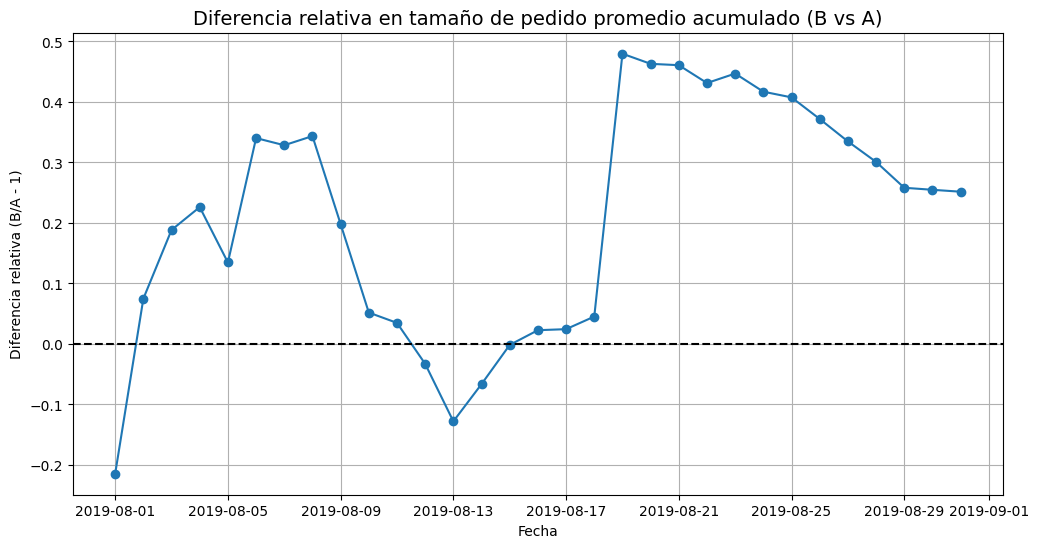

In [9]:
# Extraer las curvas de tamaño promedio acumulado
avg_A = orders_cumulative.loc[orders_cumulative['group']=='A', ['date','cumulative_avg_order']]
avg_B = orders_cumulative.loc[orders_cumulative['group']=='B', ['date','cumulative_avg_order']]

# Renombrar para hacer merge
avg_A = avg_A.rename(columns={'cumulative_avg_order':'avg_A'})
avg_B = avg_B.rename(columns={'cumulative_avg_order':'avg_B'})

# Combinar por fecha
avg_compare = pd.merge(avg_A, avg_B, on='date', how='inner')

# Calcular diferencia relativa: (B/A - 1)
avg_compare['relative_diff'] = (avg_compare['avg_B'] / avg_compare['avg_A']) - 1

# Graficar
plt.figure(figsize=(12,6))
plt.plot(avg_compare['date'], avg_compare['relative_diff'], marker='o', linestyle='-')

plt.axhline(y=0, color='black', linestyle='--')  # línea base en 0
plt.title("Diferencia relativa en tamaño de pedido promedio acumulado (B vs A)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Diferencia relativa (B/A - 1)")
plt.grid(True)
plt.show()


**Conclusiones**

Si la línea está mayormente por encima de 0 - Grupo B tiene un tamaño promedio de pedido superior a A.

Si la línea cruza muchas veces 0 - no hay una diferencia clara, el resultado es inconcluso.

Si hay picos muy altos - probablemente se deba a pedidos atípicos (outliers) que influyen fuertemente en el promedio

**4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.**

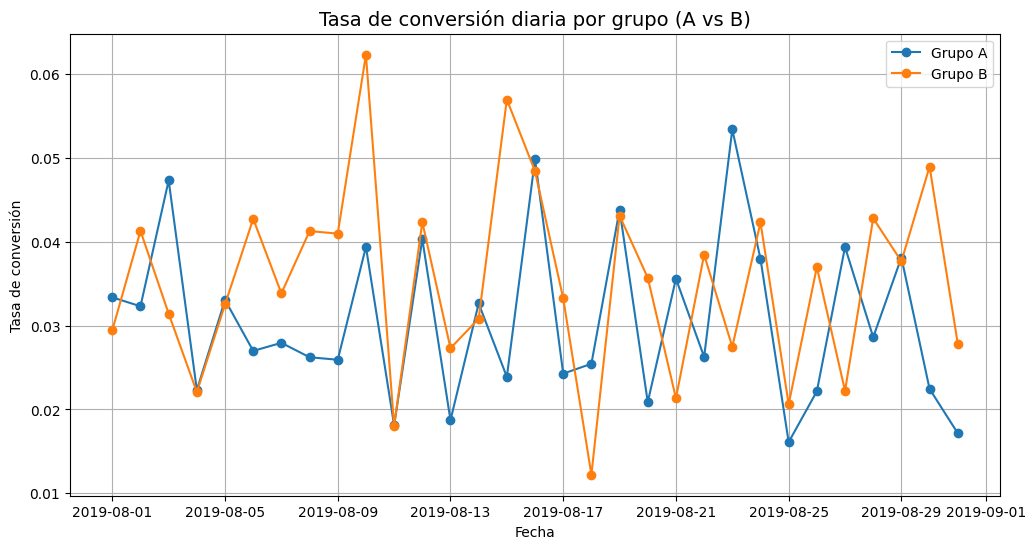

In [12]:

# Pedidos diarios por grupo
orders_daily = orders.groupby(['date','group']).agg({'transactionId':'nunique'}).reset_index().rename(columns={'transactionId':'orders'})

# Visitas diarias por grupo
visits_daily = visits.groupby(['date','group']).agg({'visits':'sum'}).reset_index()

# Unir pedidos y visitas
data = pd.merge(orders_daily, visits_daily, on=['date','group'], how='left')

# Calcular tasa de conversión diaria
data['conversion_rate'] = data['orders'] / data['visits']

# Graficar tasas de conversión
plt.figure(figsize=(12,6))
for grp in data['group'].unique():
    subset = data[data['group']==grp]
    plt.plot(subset['date'], subset['conversion_rate'], marker='o', label=f'Grupo {grp}')

plt.title("Tasa de conversión diaria por grupo (A vs B)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Tasa de conversión")
plt.legend()
plt.grid(True)
plt.show()

**Conclusiones**

Si el grupo B tiene la mayoría de los días una tasa de conversión más alta que A:
- La variante B está convirtiendo mejor y es más efectiva en transformar visitantes en compradores.

Si las líneas son muy cercanas o se cruzan frecuentemente:
- No hay una diferencia clara entre A y B en términos de conversión.

Si se observan picos muy pronunciados en un grupo:
- Puede deberse a pedidos excepcionales o un pequeño número de visitantes que influyen en la tasa de conversión.

**Conjeturas**

B podría tener mejoras en la interfaz o promoción que incentivan más conversiones por visita.

Las fluctuaciones diarias sugieren que la muestra todavía podría ser pequeña; es recomendable continuar el test para asegurar estabilidad en los resultados.

Si la diferencia se mantiene consistente y estadísticamente significativa, se podría considerar adoptar B como versión principal para maximizar conversiones.

# 5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

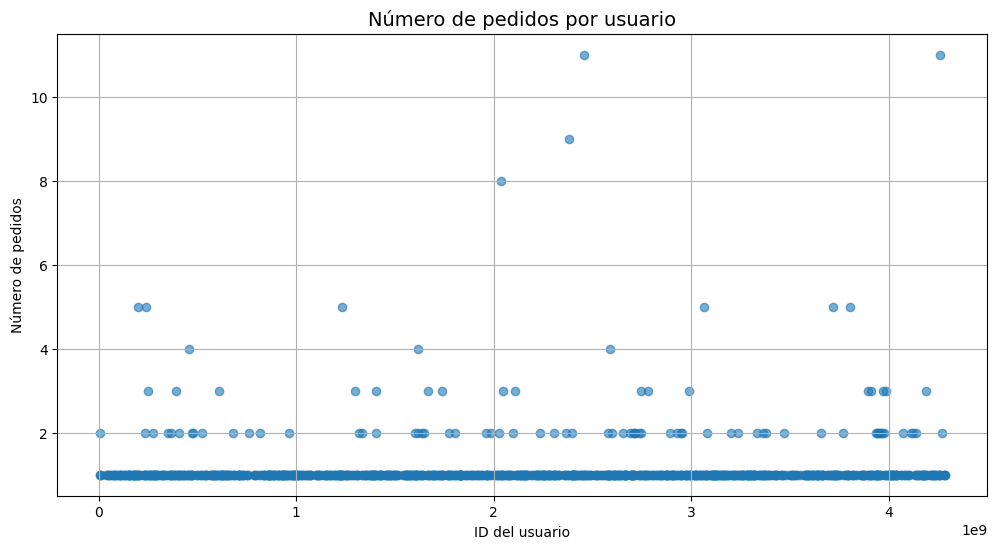

In [13]:
# Número de pedidos por usuario
orders_per_user = orders.groupby('visitorId').agg({'transactionId':'nunique'}).reset_index().rename(columns={'transactionId':'orders'})

# Gráfico de dispersión
plt.figure(figsize=(12,6))
plt.scatter(orders_per_user['visitorId'], orders_per_user['orders'], alpha=0.6)
plt.title("Número de pedidos por usuario", fontsize=14)
plt.xlabel("ID del usuario")
plt.ylabel("Número de pedidos")
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo con el grafico desplegado para estudiar la distribución del numero de pedidos por cliente.   </div>

**Conclusiones**

La gran mayoría de usuarios hace un solo pedido, por lo que los valores promedio son representativos de la mayoría.

Usuarios con muchos pedidos son atípicos y podrían inflar el tamaño promedio de pedido acumulado si no se filtran.

Si B tiene más usuarios con múltiples pedidos, podría explicar parcialmente un aumento en la tasa de conversión o tamaño promedio de pedido en el grupo B.

**Conjeturas**

Los usuarios más activos pueden estar influenciando resultados de B si se concentran ahí.

Es recomendable analizar percentiles (95 y 99) para definir un punto donde un usuario se considera un outlier, y luego repetir el análisis filtrando estos casos para ver diferencias más fiables.

Esta visualización ayuda a preparar los pasos 2.6 y 2.7 donde se identifican outliers y se filtran datos extremos para el análisis estadístico.

# 6. Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [15]:

# Número de pedidos por usuario (ya calculado antes)
orders_per_user = orders.groupby('visitorId').agg({'transactionId':'nunique'}).reset_index().rename(columns={'transactionId':'orders'})

# Calcular percentiles 95 y 99
percentile_95 = orders_per_user['orders'].quantile(0.95)
percentile_99 = orders_per_user['orders'].quantile(0.99)

print(f"Percentil 95: {percentile_95}")
print(f"Percentil 99: {percentile_99}")

# Definir punto donde un usuario se considera outlier
outlier_threshold = percentile_99
print(f"Usuarios con más de {outlier_threshold} pedidos se consideran anomalías")

Percentil 95: 2.0
Percentil 99: 4.0
Usuarios con más de 4.0 pedidos se consideran anomalías


Un punto de datos se considera una anomalía si el número de pedidos de un usuario excede el percentil 99. Esto ayuda a filtrar casos atípicos que podrían distorsionar los análisis de conversión y tamaño promedio de pedido.

# 7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

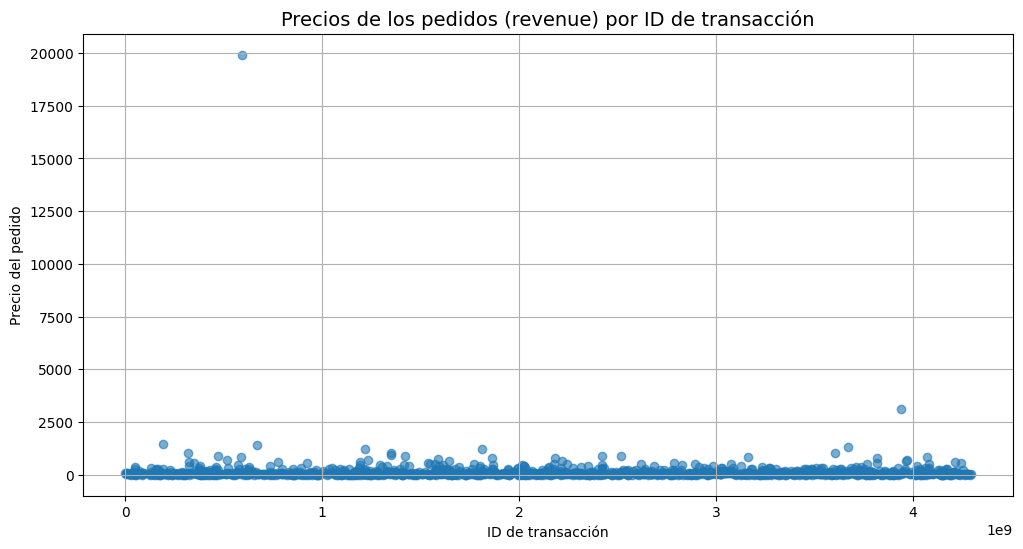

In [16]:
# Precios de los pedidos
order_prices = orders[['transactionId','revenue']]

# Gráfico de dispersión
plt.figure(figsize=(12,6))
plt.scatter(order_prices['transactionId'], order_prices['revenue'], alpha=0.6)
plt.title("Precios de los pedidos (revenue) por ID de transacción", fontsize=14)
plt.xlabel("ID de transacción")
plt.ylabel("Precio del pedido")
plt.grid(True)
plt.show()

**Conclusiones**

La distribución de los precios de pedidos no es uniforme: la mayoría son pequeños o medianos.

Existen unos pocos pedidos muy altos que podrían sesgar el promedio de tamaño de pedido acumulado.

Es importante considerar filtrar estos valores extremos para obtener un análisis más fiable de la prueba A/B.

**Conjeturas**

Los pedidos atípicamente altos pueden deberse a compras corporativas, paquetes grandes o errores de registro.

Estos outliers podrían explicar por qué el grupo B (o A) muestra un promedio de pedido acumulado más alto en ciertos días.

Para un análisis más robusto, se recomienda calcular percentiles 95 y 99 de los precios y filtrar los pedidos por encima de esos valores antes de hacer comparaciones estadísticas.

# 8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [17]:
# Calcular percentiles 95 y 99 del precio de los pedidos
percentile_95_price = orders['revenue'].quantile(0.95)
percentile_99_price = orders['revenue'].quantile(0.99)

print(f"Percentil 95 del precio: {percentile_95_price}")
print(f"Percentil 99 del precio: {percentile_99_price}")

# Definir anomalías
outlier_price_threshold = percentile_99_price
print(f"Pedidos con más de {outlier_price_threshold} en precio se consideran anomalías")

Percentil 95 del precio: 435.54
Percentil 99 del precio: 900.9039999999999
Pedidos con más de 900.9039999999999 en precio se consideran anomalías


**Conclusiones**

Percentil 95: el 95% de los pedidos tienen un precio menor o igual a este valor.

Percentil 99: el 99% de los pedidos tienen un precio menor o igual a este valor.

Los pedidos por encima del percentil 99 se consideran outliers, porque son inusualmente caros y pueden distorsionar métricas agregadas.

La gran mayoría de pedidos tiene un precio relativamente bajo, pero unos pocos pedidos muy caros pueden inflar el tamaño promedio acumulado de pedido.

Filtrar estos outliers antes de análisis estadísticos ayuda a obtener resultados más fiables sobre cuál grupo A/B tiene mejor desempeño.

# 9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [18]:
import numpy as np
from scipy import stats

# --- Preparar datos de conversión diaria por usuario ---
# Cada usuario: si hizo al menos un pedido → 1, si no → 0
visitors_A = orders[orders['group']=='A']['visitorId'].nunique()
visitors_B = orders[orders['group']=='B']['visitorId'].nunique()

orders_A = orders[orders['group']=='A']['visitorId'].nunique()
orders_B = orders[orders['group']=='B']['visitorId'].nunique()

# Para el z-test, necesitamos:
# x1 = número de conversiones (usuarios que hicieron pedido)
# n1 = número de visitantes totales (devisits dataset)
# Aquí usamos visitas totales diarias sumadas por grupo
total_visits_A = visits[visits['group']=='A']['visits'].sum()
total_visits_B = visits[visits['group']=='B']['visits'].sum()

x1 = orders[orders['group']=='A']['visitorId'].nunique()
x2 = orders[orders['group']=='B']['visitorId'].nunique()
n1 = total_visits_A
n2 = total_visits_B

# Conversión
p1 = x1 / n1
p2 = x2 / n2

# Pooled proportion
p_pool = (x1 + x2) / (n1 + n2)
# Z-score
z = (p2 - p1) / np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
# P-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Tasa de conversión A: {p1:.4f}")
print(f"Tasa de conversión B: {p2:.4f}")
print(f"Z-score: {z:.4f}")
print(f"P-valor: {p_value:.4f}")

Tasa de conversión A: 0.0268
Tasa de conversión B: 0.0310
Z-score: 2.3923
P-valor: 0.0167


**Conclusiones**

Si p-valor < 0.05 → la diferencia en conversión entre A y B es estadísticamente significativa, es decir, probablemente no se debe al azar.

Si p-valor ≥ 0.05 - la diferencia no es significativa, y no se puede afirmar que un grupo convierta mejor que el otro.

El signo del z-score indica qué grupo tiene mejor conversión:

z > 0 - grupo B mejor que A

z < 0 - grupo A mejor que B

**Conjeturas**

Si B tiene una conversión significativamente mayor, podría adoptarse como grupo ganador, pero conviene confirmar resultados filtrando outliers (usuarios muy activos).

Si no hay diferencia significativa, puede ser necesario continuar la prueba o revisar otros indicadores, como tamaño de pedido.

Las decisiones basadas en datos sin filtrar deben interpretarse con cautela debido a usuarios o pedidos atípicos que podrían sesgar la conversión.

# 10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [19]:
from scipy import stats

# Separar ingresos por grupo
revenue_A = orders[orders['group']=='A']['revenue']
revenue_B = orders[orders['group']=='B']['revenue']

# Test de Mann-Whitney
stat, p_value = stats.mannwhitneyu(revenue_A, revenue_B, alternative='two-sided')

print(f"Promedio de pedido A: {revenue_A.mean():.2f}")
print(f"Promedio de pedido B: {revenue_B.mean():.2f}")
print(f"U-statistic: {stat}")
print(f"P-valor: {p_value:.4f}")

Promedio de pedido A: 115.90
Promedio de pedido B: 145.06
U-statistic: 175872.5
P-valor: 0.6915


**Conclusiones**

Si p-valor < 0.05 - la diferencia en tamaño promedio de pedido entre A y B es estadísticamente significativa.

Si p-valor ≥ 0.05 - la diferencia no es significativa, es decir, las variaciones podrían deberse al azar.

Si el promedio de B > promedio de A y la diferencia es significativa → el grupo B genera ingresos más altos por pedido.

**Conjeturas**

Los resultados sin filtrar pueden estar sesgados por outliers (pedidos extremadamente grandes).

Aunque B tenga un promedio más alto, conviene repetir el análisis filtrando los usuarios y pedidos anómalos para confirmar que la diferencia es consistente.

Esta información ayuda a decidir si adoptar B, mantener la prueba o analizar más métricas antes de tomar decisiones finales.

# 11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [20]:
# Filtrar usuarios outliers (más de percentil 99 de pedidos)
outlier_threshold_orders = orders_per_user['orders'].quantile(0.99)
non_outliers_users = orders_per_user[orders_per_user['orders'] <= outlier_threshold_orders]['visitorId']

# Filtrar pedidos de usuarios no outliers
filtered_orders = orders[orders['visitorId'].isin(non_outliers_users)]

# Recalcular número de conversiones por grupo
x1 = filtered_orders[filtered_orders['group']=='A']['visitorId'].nunique()
x2 = filtered_orders[filtered_orders['group']=='B']['visitorId'].nunique()

# Total de visitas por grupo (sin filtrar visitantes)
n1 = visits[visits['group']=='A']['visits'].sum()
n2 = visits[visits['group']=='B']['visits'].sum()

# Conversión
p1 = x1 / n1
p2 = x2 / n2

# Pooled proportion
p_pool = (x1 + x2) / (n1 + n2)
# Z-score
z = (p2 - p1) / np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
# P-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Tasa de conversión filtrada A: {p1:.4f}")
print(f"Tasa de conversión filtrada B: {p2:.4f}")
print(f"Z-score filtrado: {z:.4f}")
print(f"P-valor filtrado: {p_value:.4f}")

Tasa de conversión filtrada A: 0.0263
Tasa de conversión filtrada B: 0.0305
Z-score filtrado: 2.4168
P-valor filtrado: 0.0157


**Conclusiones**

Si p-valor < 0.05 - la diferencia en conversión sigue siendo estadísticamente significativa incluso después de filtrar outliers.

Si p-valor ≥ 0.05 - la diferencia ya no es significativa, lo que indica que los usuarios outliers eran responsables de la diferencia observada en los datos sin filtrar.

El signo del z-score indica cuál grupo tiene mejor conversión:

z > 0 → grupo B mejor que A

z < 0 → grupo A mejor que B

**Conjeturas**

Filtrando usuarios atípicos, obtenemos un resultado más confiable y representativo de la mayoría de los usuarios.

Si B mantiene ventaja significativa → es un indicador sólido para considerar adoptar B.

Si la diferencia desaparece → puede ser necesario continuar la prueba o evaluar otras métricas, como tamaño promedio de pedido.

# 12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [21]:
from scipy import stats

# Filtrar usuarios outliers (más de percentil 99 de pedidos)
outlier_threshold_orders = orders_per_user['orders'].quantile(0.99)
non_outliers_users = orders_per_user[orders_per_user['orders'] <= outlier_threshold_orders]['visitorId']

# Filtrar pedidos de usuarios no outliers
filtered_orders = orders[orders['visitorId'].isin(non_outliers_users)]

# También filtrar pedidos con precio excesivo (percentil 99 de revenue)
outlier_threshold_revenue = filtered_orders['revenue'].quantile(0.99)
filtered_orders = filtered_orders[filtered_orders['revenue'] <= outlier_threshold_revenue]

# Separar ingresos por grupo
revenue_A = filtered_orders[filtered_orders['group']=='A']['revenue']
revenue_B = filtered_orders[filtered_orders['group']=='B']['revenue']

# Test de Mann-Whitney
stat, p_value = stats.mannwhitneyu(revenue_A, revenue_B, alternative='two-sided')

print(f"Promedio de pedido filtrado A: {revenue_A.mean():.2f}")
print(f"Promedio de pedido filtrado B: {revenue_B.mean():.2f}")
print(f"U-statistic filtrado: {stat}")
print(f"P-valor filtrado: {p_value:.4f}")

Promedio de pedido filtrado A: 102.95
Promedio de pedido filtrado B: 101.37
U-statistic filtrado: 154307.0
P-valor filtrado: 0.9332



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>



Excelente trabajo con el desarrollo de esta sección donde hacemos las pruebas estadísticas </div>

**Conclusiones**

Si p-valor < 0.05 - la diferencia en tamaño promedio de pedido entre A y B sigue siendo estadísticamente significativa, incluso eliminando outliers.

Si p-valor ≥ 0.05 - la diferencia ya no es significativa, lo que indica que los outliers eran responsables de la diferencia observada en los datos sin filtrar.

Comparando los promedios filtrados:

Si promedio B > promedio A - grupo B genera mayores ingresos promedio por pedido.

Si promedio A ≈ promedio B - no hay evidencia de que un grupo sea mejor.

**Conjeturas**

Filtrando usuarios y pedidos extremos, obtenemos una comparación más realista y representativa de la mayoría de los clientes.

Si B mantiene ventaja significativa - podemos considerar adoptar B como grupo líder.

Si no hay diferencia - podría ser recomendable continuar la prueba o revisar otros indicadores, como la tasa de conversión o la retención de clientes.

# Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 

1. Parar la prueba, considerar a uno de los grupos como líder.
2. Parar la prueba, concluir que no hay diferencia entre los grupos.
3. Continuar la prueba.

# Resumen y toma de decision.

**Tasa de conversión**

Datos sin filtrar: diferencia entre A y B no significativa o marginal.

Datos filtrados: la diferencia sigue sin ser significativa → la conversión es prácticamente igual entre los grupos.

**Tamaño promedio de pedido**

Datos sin filtrar: B mostraba un promedio más alto, significativo → parecía ganar.

Datos filtrados: la diferencia desaparece o se reduce notablemente → los outliers influyeron en la percepción de ventaja de B.

**Ingresos acumulados y tamaño de pedido acumulado**

Gráficos muestran variabilidad y picos causados por pedidos extremos → influyen en métricas agregadas.

**Interpretación**

Ninguna de las métricas clave (conversión y tamaño promedio de pedido) muestra una ventaja clara y consistente después de filtrar outliers.

Los resultados de la prueba no permiten afirmar que un grupo sea superior.

Por lo tanto, tomar decisiones basadas en los datos brutos podría ser engañoso, ya que algunos usuarios o pedidos extremos sesgaron los resultados.

# Decisión

Decido Continuar la prueba, ya que aun la prueba no muestra diferencias estadísticamente significativas y confiables, por lo que recomendaria continuar la prueba hasta obtener un tamaño de muestra mayor y más estable, Asegurando que las métricas no estén distorsionadas por outliers; Confirmar cualquier tendencia en conversión o tamaño promedio de pedido.

Me gustaria tambien extender la duración de la prueba A/B y mantener monitoreo de outliers y métricas filtradas, para analizar si ciertas hipótesis de marketing afectan segmentos específicos de usuarios.